# Machine learning study using penguin data

## Data collection

In [5]:
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset('penguins')
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


## Data Preprocessing

In [9]:
# Removing rows with missing values
penguins.dropna(inplace=True)

# One-Hot Encoding of categorical features (species, island, sex)
penguins_encoded = pd.get_dummies(penguins, columns=['island', 'sex'], drop_first=True)

# Separating features (X) and target (y)
X = penguins_encoded.drop(columns=['species'])
y = penguins['species']

##  Data Splitting

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating a Pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling numerical data
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])


## Model Training and Validation

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average CV score: {cv_scores.mean()}')

# Train the pipeline and evaluate on the test data
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation on the test data
print(classification_report(y_test, y_pred))


Cross-validation scores: [0.98148148 0.98113208 1.         0.98113208 0.98113208]
Average CV score: 0.9849755415793151
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


## Result Analysis

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



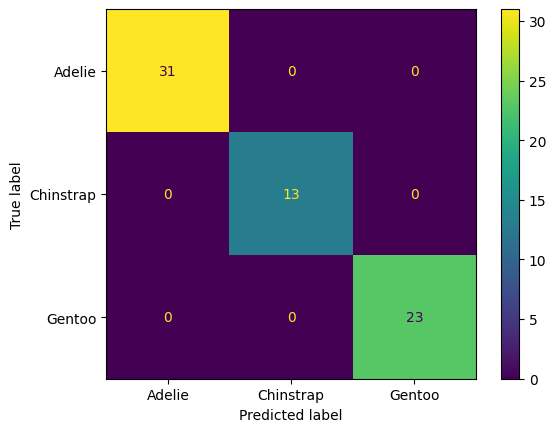

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Classification report for the best model
print(classification_report(y_test, y_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
